Mohammed Zahir Ali (1020191025)

In [223]:
# Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [224]:
# Read and standardise the data
df = pd.read_excel('Week12_ExamExcel_MohammedZahirAli.xlsx')
df.drop(['Date', 'NIFTY_Returns'], axis=1, inplace=True) # Either inplace Or df = df.drop
print(df.head())
X_std = StandardScaler().fit_transform(df)

   TataSteel_Returns  Infosys_Returns  SBI_Returns  AshokaLeyland_Returns  \
0           0.036075         0.010982     0.024500               0.026834   
1           0.021066         0.023741     0.031152               0.030216   
2           0.003282         0.005591    -0.005900               0.010305   
3           0.002677        -0.002298     0.012381               0.003531   
4          -0.012458        -0.007818    -0.013948               0.001955   

   BHEL_Returns  Bluedart_Returns  Edelweiss_Returns  GAIL_Returns  
0      0.019704         -0.004263           0.020378      0.028716  
1      0.008052          0.012083           0.010699      0.008676  
2      0.024760          0.003418           0.079746      0.004114  
3      0.006235         -0.011760          -0.012418      0.008939  
4     -0.009295          0.007009          -0.006618     -0.015504  


In [225]:
# Obtain the variance - convariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00406504 0.29488276 0.43920883 0.28194936 0.50297499 0.2329399
  0.23825218 0.52430419]
 [0.29488276 1.00406504 0.34974791 0.28296401 0.26164573 0.18488681
  0.2458294  0.16175492]
 [0.43920883 0.34974791 1.00406504 0.52346378 0.51068067 0.28245856
  0.33717862 0.30904105]
 [0.28194936 0.28296401 0.52346378 1.00406504 0.45850685 0.35436759
  0.37349464 0.24577019]
 [0.50297499 0.26164573 0.51068067 0.45850685 1.00406504 0.22167449
  0.34238065 0.45255233]
 [0.2329399  0.18488681 0.28245856 0.35436759 0.22167449 1.00406504
  0.27542838 0.14461325]
 [0.23825218 0.2458294  0.33717862 0.37349464 0.34238065 0.27542838
  1.00406504 0.18087954]
 [0.52430419 0.16175492 0.30904105 0.24577019 0.45255233 0.14461325
  0.18087954 1.00406504]]


In [226]:
# Obtain the Eigen vectors and Eigen value
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-3.85301434e-01  4.18963477e-01  6.20180260e-01  9.80514426e-02
   4.51815903e-01 -1.30551682e-01 -2.45709584e-01 -1.48397519e-02]
 [-2.83231375e-01 -1.77120496e-01 -5.88571046e-02 -1.16150354e-01
  -2.16730433e-01 -1.25452829e-01 -3.34227769e-01 -8.34885956e-01]
 [-4.16297591e-01 -7.74434102e-02 -4.47892266e-01  4.72850769e-01
   4.33062867e-01  4.10411215e-01  1.64242290e-01 -1.16392271e-01]
 [-3.84127837e-01 -3.13060629e-01  5.00631549e-01  9.44036148e-02
  -4.84422941e-01  4.35422109e-01  2.40945402e-01  1.12170274e-01]
 [-4.18690676e-01  2.02782795e-01 -2.05583056e-01 -7.99664208e-01
   9.48243604e-02  1.24145425e-01  2.68243327e-01  7.41066035e-02]
 [-2.68220438e-01 -4.35204210e-01 -1.56895306e-01 -1.14829713e-01
   4.82082252e-02 -3.44012328e-02 -6.85209182e-01  4.77319591e-01]
 [-3.11340320e-01 -3.63570325e-01 -4.27757797e-04  1.17617448e-01
   7.09251332e-02 -7.45116737e-01  4.35285510e-01  8.57145026e-02]
 [-3.26018457e-01  5.71302501e-01 -3.06255031e-01  2.

In [227]:
# Create eigen value and eigen vector pairs
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eigen_pairs

[(3.321333227625602,
  array([-0.38530143, -0.28323138, -0.41629759, -0.38412784, -0.41869068,
         -0.26822044, -0.31134032, -0.32601846])),
 (1.0972050651183158,
  array([ 0.41896348, -0.1771205 , -0.07744341, -0.31306063,  0.20278279,
         -0.43520421, -0.36357032,  0.5713025 ])),
 (0.4017490926788235,
  array([ 6.20180260e-01, -5.88571046e-02, -4.47892266e-01,  5.00631549e-01,
         -2.05583056e-01, -1.56895306e-01, -4.27757797e-04, -3.06255031e-01])),
 (0.4478029788900039,
  array([ 0.09805144, -0.11615035,  0.47285077,  0.09440361, -0.79966421,
         -0.11482971,  0.11761745,  0.27912819])),
 (0.5026577144190003,
  array([ 0.4518159 , -0.21673043,  0.43306287, -0.48442294,  0.09482436,
          0.04820823,  0.07092513, -0.55707738])),
 (0.6858357430476456,
  array([-0.13055168, -0.12545283,  0.41041122,  0.43542211,  0.12414542,
         -0.03440123, -0.74511674, -0.19337421])),
 (0.7467860295171299,
  array([-0.24570958, -0.33422777,  0.16424229,  0.2409454 ,  0.2

In [228]:
# Compute the cumulative variance
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 41.34858168  55.00811842  65.33053829  74.62757084  83.16580934
  89.42359263  94.99846777 100.        ]


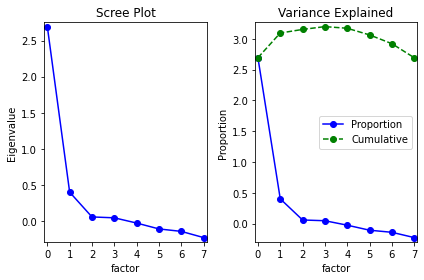

In [229]:
#Make the scree plot
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [230]:
# Extract the Principal Components
from statsmodels.multivariate.pca import PCA
pc = PCA(df,
         ncomp = 8,
         standardize = True,
         demean = True) # Remove average, mean centering, this was done to df here, X_std before

In [231]:
# Compute the loadings on the variables
df_comp = pc.loadings.T
df_comp

,TataSteel_Returns,Infosys_Returns,SBI_Returns,AshokaLeyland_Returns,BHEL_Returns,Bluedart_Returns,Edelweiss_Returns,GAIL_Returns
comp_0,-0.385301,-0.283231,-0.416298,-0.384128,-0.418691,-0.268220,-0.311340,-0.326018
comp_1,0.418963,-0.177120,-0.077443,-0.313061,0.202783,-0.435204,-0.363570,0.571303
comp_2,-0.014840,-0.834886,-0.116392,0.112170,0.074107,0.477320,0.085715,0.189587
comp_3,0.245710,0.334228,-0.164242,-0.240945,-0.268243,0.685209,-0.435286,0.109311
comp_4,-0.130552,-0.125453,0.410411,0.435422,0.124145,-0.034401,-0.745117,-0.193374
comp_5,0.451816,-0.216730,0.433063,-0.484423,0.094824,0.048208,0.070925,-0.557077
comp_6,-0.098051,0.116150,-0.472851,-0.094404,0.799664,0.114830,-0.117617,-0.279128
comp_7,0.620180,-0.058857,-0.447892,0.500632,-0.205583,-0.156895,-0.000428,-0.306255


In [232]:
# Compute the PC Scores
# Vectors multiplied with OG data to get PC scores
scores = pd.DataFrame(pc.factors)
scores

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7
0,-0.093528,0.049786,-0.023061,-0.036596,0.006669,-0.014325,-0.079749,0.029971
1,-0.087404,-0.035967,-0.054220,0.021743,0.052710,0.004735,-0.077027,0.003561
2,-0.052243,-0.058839,0.017416,-0.094777,-0.167278,-0.019334,0.046116,0.020758
3,-0.006634,0.044696,-0.017106,-0.032552,0.049334,0.001274,-0.035484,-0.022949
4,0.039044,-0.042049,0.031839,0.017474,0.003990,-0.012238,0.037039,0.041894
...,...,...,...,...,...,...,...,...
242,-0.004338,-0.075063,0.059670,0.036914,-0.003541,-0.008023,-0.009560,-0.020154
243,-0.006317,0.038041,0.001275,0.045767,-0.035481,-0.005352,-0.028629,-0.016147
244,-0.020904,0.036874,0.011603,0.010516,-0.019324,-0.011790,0.107553,0.031630
245,-0.021937,0.018272,-0.081105,0.007675,0.016614,0.082607,0.017476,0.059543


In [233]:
df = pd.read_excel('Week12_ExamExcel_MohammedZahirAli.xlsx')
df.head()

,Date,TataSteel_Returns,Infosys_Returns,SBI_Returns,AshokaLeyland_Returns,BHEL_Returns,Bluedart_Returns,Edelweiss_Returns,GAIL_Returns,NIFTY_Returns
0,2021-12-07,0.036075,0.010982,0.024500,0.026834,0.019704,-0.004263,0.020378,0.028716,0.015637
1,2021-12-08,0.021066,0.023741,0.031152,0.030216,0.008052,0.012083,0.010699,0.008676,0.017061
2,2021-12-09,0.003282,0.005591,-0.005900,0.010305,0.024760,0.003418,0.079746,0.004114,0.002696
3,2021-12-10,0.002677,-0.002298,0.012381,0.003531,0.006235,-0.011760,-0.012418,0.008939,-0.000317
4,2021-12-13,-0.012458,-0.007818,-0.013948,0.001955,-0.009295,0.007009,-0.006618,-0.015504,-0.008169


In [234]:
df_X = df.drop(['Date', 'NIFTY_Returns'], axis=1)
X = df_X
print("X:")
print(X.head())
print("\nY:")
df_Y = df['NIFTY_Returns']
Y = df_Y
print(Y.head())

X:
   TataSteel_Returns  Infosys_Returns  SBI_Returns  AshokaLeyland_Returns  \
0           0.036075         0.010982     0.024500               0.026834   
1           0.021066         0.023741     0.031152               0.030216   
2           0.003282         0.005591    -0.005900               0.010305   
3           0.002677        -0.002298     0.012381               0.003531   
4          -0.012458        -0.007818    -0.013948               0.001955   

   BHEL_Returns  Bluedart_Returns  Edelweiss_Returns  GAIL_Returns  
0      0.019704         -0.004263           0.020378      0.028716  
1      0.008052          0.012083           0.010699      0.008676  
2      0.024760          0.003418           0.079746      0.004114  
3      0.006235         -0.011760          -0.012418      0.008939  
4     -0.009295          0.007009          -0.006618     -0.015504  

Y:
0    0.015637
1    0.017061
2    0.002696
3   -0.000317
4   -0.008169
Name: NIFTY_Returns, dtype: float64


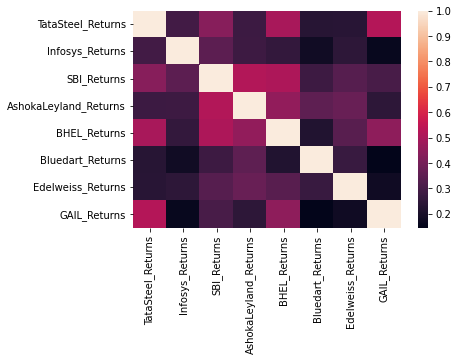

In [235]:
sns.heatmap(df_X.corr())
plt.show()

In [236]:
import statsmodels.api as sm
# This adds the constant term beta0 to the Multiple Linear Regression
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NIFTY_Returns   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           6.73e-84
Time:                        11:33:30   Log-Likelihood:                 973.67
No. Observations:                 247   AIC:                            -1929.
Df Residuals:                     238   BIC:                            -1898.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.842e-06      0.000     -0.032      0.974      -0.001       0.001
TataSteel_Returns         0.0954      0.016      5.963      0.000       0.064       0.127
Infosys_Returns           0.2516      0.019     13.103      0.000       0.214       0.289
SBI_Returns               0.2043      0.024      8.484      0.000       0.157       0.252
AshokaLeyland_Returns     0.1118      0.018      6.217      0.000       0.076       0.147
BHEL_Returns              0.0243      0.015      1.610      0.109      -0.005       0.054
Bluedart_Returns          0.0355      0.019      1.869      0.063      -0.002       0.073
Edelweiss_Returns         0.0371      0.013      2.925      0.004       0.012       0.062
GAIL_Returns             -0.0278      0.019     -1.478      0.141      -0.065       0.009
==============================================================================
Omnibus:                        5.770   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                8.552
Skew:                           0.038   Prob(JB):                       0.0139
Kurtosis:                       3.908   Cond. No.                         84.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
from statsmodels.multivariate.pca import PCA
pc = PCA(df_X, # It should only have X's
         ncomp = 8,
         standardize = True) # Because the data has different units Rs./Numbers etc.

df_comp = pc.loadings.T # pc.loadings are the eigen vectors that we computed, we are then transposing it so we can see it nicely
df_comp

,TataSteel_Returns,Infosys_Returns,SBI_Returns,AshokaLeyland_Returns,BHEL_Returns,Bluedart_Returns,Edelweiss_Returns,GAIL_Returns
comp_0,-0.385301,-0.283231,-0.416298,-0.384128,-0.418691,-0.268220,-0.311340,-0.326018
comp_1,0.418963,-0.177120,-0.077443,-0.313061,0.202783,-0.435204,-0.363570,0.571303
comp_2,-0.014840,-0.834886,-0.116392,0.112170,0.074107,0.477320,0.085715,0.189587
comp_3,0.245710,0.334228,-0.164242,-0.240945,-0.268243,0.685209,-0.435286,0.109311
comp_4,-0.130552,-0.125453,0.410411,0.435422,0.124145,-0.034401,-0.745117,-0.193374
comp_5,0.451816,-0.216730,0.433063,-0.484423,0.094824,0.048208,0.070925,-0.557077
comp_6,-0.098051,0.116150,-0.472851,-0.094404,0.799664,0.114830,-0.117617,-0.279128
comp_7,0.620180,-0.058857,-0.447892,0.500632,-0.205583,-0.156895,-0.000428,-0.306255


In [238]:
# PCA Scores
X_scores = pc.factors
X_scores

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7
0,-0.093528,0.049786,-0.023061,-0.036596,0.006669,-0.014325,-0.079749,0.029971
1,-0.087404,-0.035967,-0.054220,0.021743,0.052710,0.004735,-0.077027,0.003561
2,-0.052243,-0.058839,0.017416,-0.094777,-0.167278,-0.019334,0.046116,0.020758
3,-0.006634,0.044696,-0.017106,-0.032552,0.049334,0.001274,-0.035484,-0.022949
4,0.039044,-0.042049,0.031839,0.017474,0.003990,-0.012238,0.037039,0.041894
...,...,...,...,...,...,...,...,...
242,-0.004338,-0.075063,0.059670,0.036914,-0.003541,-0.008023,-0.009560,-0.020154
243,-0.006317,0.038041,0.001275,0.045767,-0.035481,-0.005352,-0.028629,-0.016147
244,-0.020904,0.036874,0.011603,0.010516,-0.019324,-0.011790,0.107553,0.031630
245,-0.021937,0.018272,-0.081105,0.007675,0.016614,0.082607,0.017476,0.059543


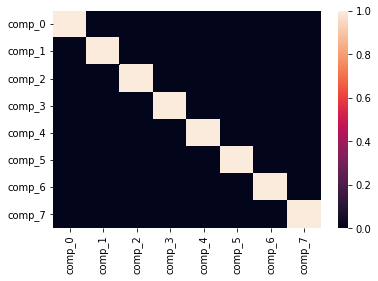

In [239]:
sns.heatmap(X_scores.corr())
plt.show() # There is no correlation because the PCs are orthogonal to each other and multi-collinearity disappears

In [240]:
# First run the PCA and then do the following lines of code
# This adds the constant term beta0 to the Multiple Linear Regression.
X_pca = sm.add_constant(X_scores)
model = sm.OLS(Y,X_pca).fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NIFTY_Returns   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           6.73e-84
Time:                        11:33:30   Log-Likelihood:                 973.67
No. Observations:                 247   AIC:                            -1929.
Df Residuals:                     238   BIC:                            -1898.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.535      0.126      -0.000       0.001
comp_0        -0.1449      0.005    -30.277      0.000      -0.154      -0.135
comp_1        -0.0265      0.005     -5.548      0.000      -0.036      -0.017
comp_2        -0.0498      0.005    -10.404      0.000      -0.059      -0.040
comp_3         0.0090      0.005      1.872      0.062      -0.000       0.018
comp_4         0.0131      0.005      2.729      0.007       0.004       0.022
comp_5         0.0100      0.005      2.081      0.038       0.001       0.019
comp_6        -0.0098      0.005     -2.044      0.042      -0.019      -0.000
comp_7         0.0082      0.005      1.722      0.086      -0.001       0.018
==============================================================================
Omnibus:                        5.770   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                8.552
Skew:                           0.038   Prob(JB):                       0.0139
Kurtosis:                       3.908   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""